In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

# Again asking the question, are clinvar variants that are in amino acids that are near glycosites more likely to be pathogenic than ones that are not, but now with continuous values

In [46]:
path_dct = {'benign':1,
            'likely benign':2,
            'likely pathogenic':3,
            'pathogenic':4}

In [47]:
df = pd.read_csv('../data/clinvar_glycoproteins_distances.txt',
                 sep='\t',
                index_col=0)
df = df.sort_values(by='clinvar_path')
df['clinvar_path_val'] = [path_dct[c] for c in df['clinvar_path']]

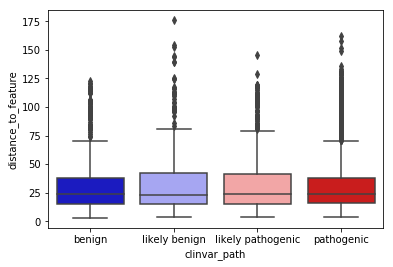

In [48]:
df = df.sort_values(by='clinvar_path')
sns.boxplot(x='clinvar_path',
            y='distance_to_feature',
            data=df,
            palette='seismic',)

In [20]:
formula = 'clinvar_path_val ~ distance_to_feature + C(aa_change)'

model = smf.ols(formula=formula, data=df).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       clinvar_path_val   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     6.476
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          5.08e-108
Time:                        11:26:05   Log-Likelihood:                -7337.2
No. Observations:                5777   AIC:                         1.497e+04
Df Residuals:                    5627   BIC:                         1.597e+04
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.7376      0.172     21.728      0.000       3.400       4.075
C(aa_change)[T.A=>E]    -0.0758      0.247     -0.306      0.759      -0.561       0.409
C(aa_change)[T.A=>G]    -1.3157      0.338     -3.896      0.000      -1.978      -0.654
C(aa_change)[T.A=>P]     0.1190      0.210      0.567      0.570      -0.292       0.530
C(aa_change)[T.A=>S]    -1.0992      0.283     -3.883      0.000      -1.654      -0.544
C(aa_change)[T.A=>T]    -0.4121      0.186     -2.215      0.027      -0.777      -0.047
C(aa_change)[T.A=>V]    -0.2293      0.192     -1.192      0.233      -0.607       0.148
C(aa_change)[T.C=>F]    -0.0946      0.283     -0.334      0.738      -0.650       0.460
C(aa_change)[T.C=>G]     0.1873      0.268      0.699      0.484      -0.338       0.712
C(aa_change)[T.C=>R]     0.1891      0.199      0.951      0.342      -0.201       0.579
C(aa_change)[T.C=>S]     0.1622      0.226      0.717      0.474      -0.281       0.606
C(aa_change)[T.C=>W]     0.1381      0.256      0.539      0.590      -0.364       0.640
C(aa_change)[T.C=>Y]     0.0989      0.193      0.513      0.608      -0.279       0.477
C(aa_change)[T.D=>A]    -0.0141      0.305     -0.046      0.963      -0.611       0.583
C(aa_change)[T.D=>E]    -0.0294      0.283     -0.104      0.917      -0.584       0.526
C(aa_change)[T.D=>G]    -0.2892      0.222     -1.301      0.193      -0.725       0.146
C(aa_change)[T.D=>H]    -0.0456      0.209     -0.218      0.827      -0.455       0.364
C(aa_change)[T.D=>N]    -0.6787      0.189     -3.588      0.000      -1.050      -0.308
C(aa_change)[T.D=>V]     0.0623      0.247      0.252      0.801      -0.422       0.547
C(aa_change)[T.D=>Y]     0.0814      0.226      0.360      0.719      -0.362       0.525
C(aa_change)[T.E=>A]    -1.1083      0.395     -2.803      0.005      -1.884      -0.333
C(aa_change)[T.E=>D]    -0.7728      0.242     -3.191      0.001      -1.248      -0.298
C(aa_change)[T.E=>G]    -0.9089      0.232     -3.914      0.000      -1.364      -0.454
C(aa_change)[T.E=>K]    -0.2039      0.186     -1.097      0.273      -0.568       0.160
C(aa_change)[T.E=>Q]    -0.5930      0.305     -1.946      0.052      -1.190       0.004
C(aa_change)[T.E=>V]     0.2466      0.297      0.831      0.406      -0.335       0.828
C(aa_change)[T.F=>C]    -0.2538      0.272     -0.932      0.352      -0.788       0.280
C(aa_change)[T.F=>I]     0.1617      0.305      0.530      0.596      -0.436       0.759
C(aa_change)[T.F=>L]    -0.0155      0.206     -0.075      0.940      -0.420       0.388
C(aa_change)[T.F=>S]    -0.0437      0.238     -0.184      0.854      -0.510       0.423
C(aa_change)[T.F=>V]     0.2392      0.264      0.908      0.364      -0.277       0.756
C(aa_change)[T.F=>Y]     0.2445      0.469      0.521    

## Looking at relationships on a per amino acid change level

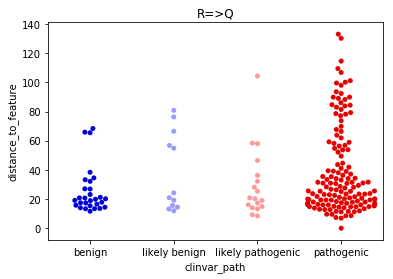

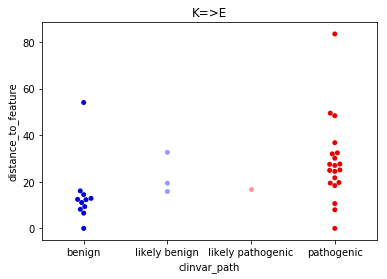

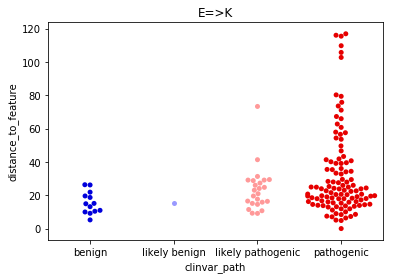

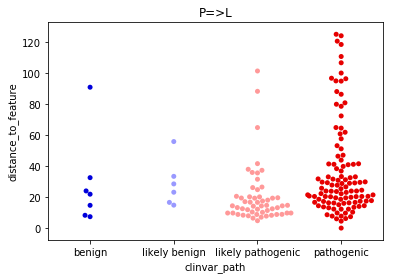

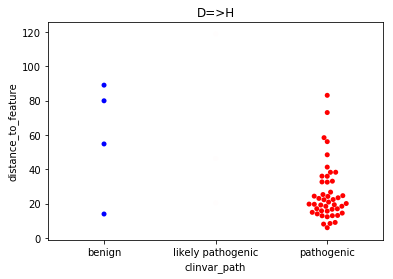

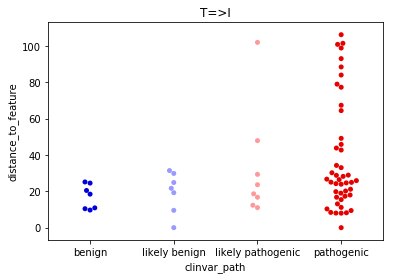

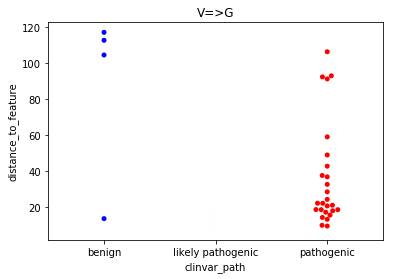

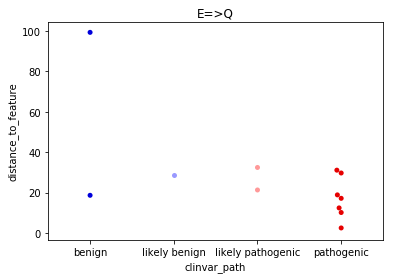

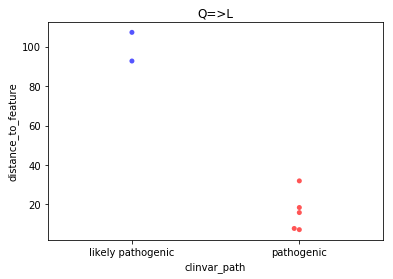

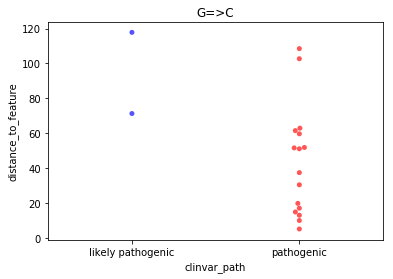

In [44]:
for ac in df['aa_change'].unique():
    aa_df = df[df['aa_change'] == ac]
    
    if aa_df.shape[0] < 3 or len(aa_df['clinvar_path'].unique()) < 2:
        continue
        
    formula = 'clinvar_path_val ~ distance_to_feature'

    model = smf.ols(formula=formula, data=aa_df).fit()  
    p = model.pvalues['distance_to_feature']
    
    if p < 0.05:
        
        sns.swarmplot(x='clinvar_path',
                        y='distance_to_feature',
                        data=aa_df,
                        palette='seismic',)

        plt.title(ac)
        plt.show()